# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [34]:
# your code here

dice_roll = np.random.randint(1, 7, size=10)
dataframe = pd.DataFrame(dice_roll, columns=['dice_roll'])

dataframe

,dice_roll
0,1
1,6
2,2
3,4
4,1
5,5
6,2
7,1
8,6
9,2


#### 2.- Plot the results sorted by value.

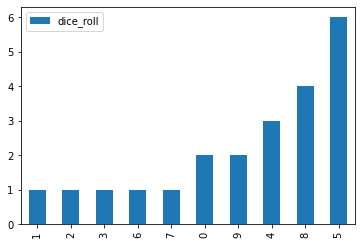

In [3]:
# your code here

dataframe = dataframe.sort_values(by='dice_roll')
dataframe.plot(kind='bar', y='dice_roll')
plt.show;

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

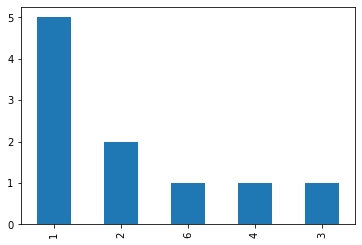

In [4]:
# your code here

dataframe = dataframe['dice_roll'].value_counts()

dataframe.plot(kind='bar', y='dice_roll')
plt.show;

In [5]:
"""
your comments here

The first plot shows every individual dice that has been thrown and it value. The other plots shows the individual dice numbers and how many times that number was rolled.

"""

'\nyour comments here\n\nThe\xa0first\xa0plot\xa0shows\xa0every\xa0individual\xa0dice that has been thrown and it value. The other plots shows the individual dice numbers and how many times that number was rolled.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [35]:
# your code here

def mean (x):
    total = 0
    length = len(x['dice_roll'])
    for dice in x['dice_roll']:
        total += dice
    return total / length

print(mean(dataframe))

3.0


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [36]:
# your code here

from collections import Counter

def mean_two (x):
    dice_rolls = [dice for dice in x['dice_roll']]
    length = len(dice_roll)
    my_diction = Counter(dice_roll)
    total = 0
    for key, value in my_diction.items():
        num1 = key
        num2 = value
        total += (num1*num2)
        solution = total/length
    return solution

print(mean_two(dataframe))

3.0


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [37]:
# your code here

def median (x):
    dice_roll = [dice for dice in x['dice_roll']]
    dice_roll.sort()
    lenght = len('dice_roll')
    if lenght % 2 == 0: 
        median_values = dice_roll[(lenght//2) -1:(lenght// 2) + 1]
        median = sum(median_values) // 2
        return median
    else:
        median = dice_roll[(lenght // 2)]
        return median

print(median(dataframe))

2


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

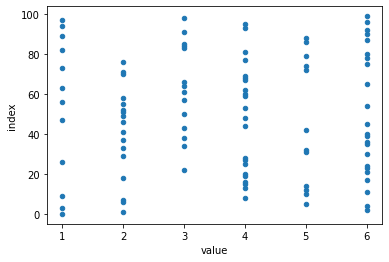

In [10]:
# your code here

dice_roll2 = pd.read_csv('../data/roll_the_dice_hundred.csv')

dice_roll2_drop = dice_roll2.drop('Unnamed: 0', axis =1)
dice_roll2_sorting = dice_roll2_drop.sort_values(by='value').reset_index()

dice_roll2_sorting.plot(kind='scatter', x='value', y='index');

In [11]:
"""
your comments here

This plot shows the distribution of the dice rolls

"""

'\nyour comments here\n\nThis plot shows the distribution of the dice rolls\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [38]:
# your code here

def mean_two (x):
    dice_rolls = [dice for dice in x['value']]
    length = len(value)
    my_diction = Counter(value)
    total = 0
    for key, value in my_diction.items():
        num1 = key
        num2 = value
        total += (num1*num2)
        solution = total/length
    return solution

print(mean_two(dice_roll2_sorting))

UnboundLocalError: local variable 'value' referenced before assignment

#### 3.- Now, calculate the frequency distribution.


In [39]:
# your code here

def median (x):
    dice_roll = [dice for dice in x['value']]
    dice_roll.sort()
    lenght = len('dice_roll')
    if lenght % 2 == 0: 
        median_values = dice_roll[(lenght//2) -1:(lenght// 2) + 1]
        median = sum(median_values) // 2
        return median
    else:
        median = dice_roll[(lenght // 2)]
        return median

print(median(dataframe))

KeyError: 'value'

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [14]:
# your code here

In [15]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

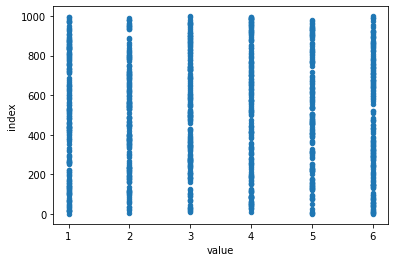

In [16]:
# your code here

dice_roll3 = pd.read_csv('../data/roll_the_dice_thousand.csv')

dice_roll3_drop = dice_roll3.drop('Unnamed: 0', axis =1)
dice_roll3_sorting = dice_roll3_drop.sort_values(by='value').reset_index()

dice_roll3_sorting.plot(kind='scatter', x='value', y='index');

In [17]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

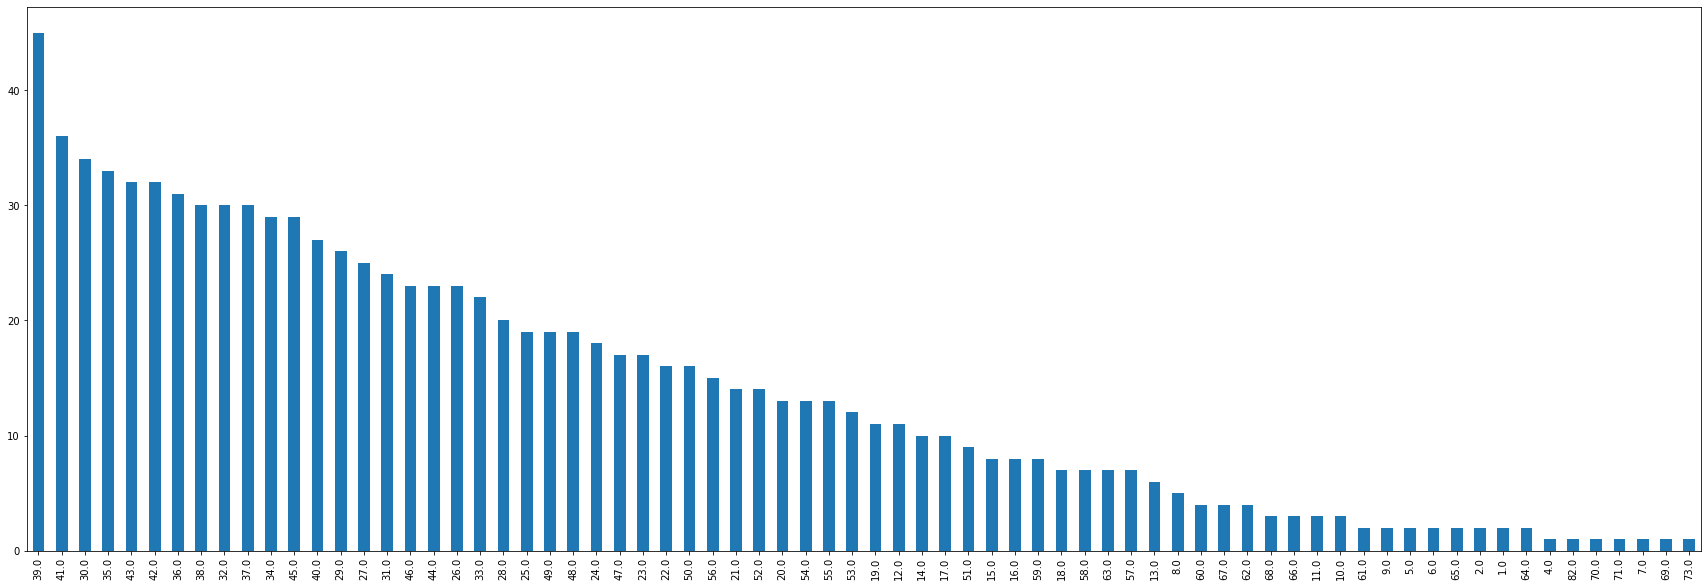

In [18]:
# your code here

age_population = pd.read_csv('../data/ages_population.csv')

age_population_sorted = age_population['observation'].value_counts()

age_population_sorted.plot(kind='bar', y='observation', figsize=(30, 10))
plt.show;

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
# your code here

age_population_mean = age_population['observation'].mean()

print(age_population_mean)

age_population_std = age_population['observation'].std()

print(age_population_std)


36.56
12.81649962597677


In [20]:
"""
your comments here

Yes they fasll inside the range I guessed.
"""

'\nyour comments here\n\nYes they fasll inside the range I guessed.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

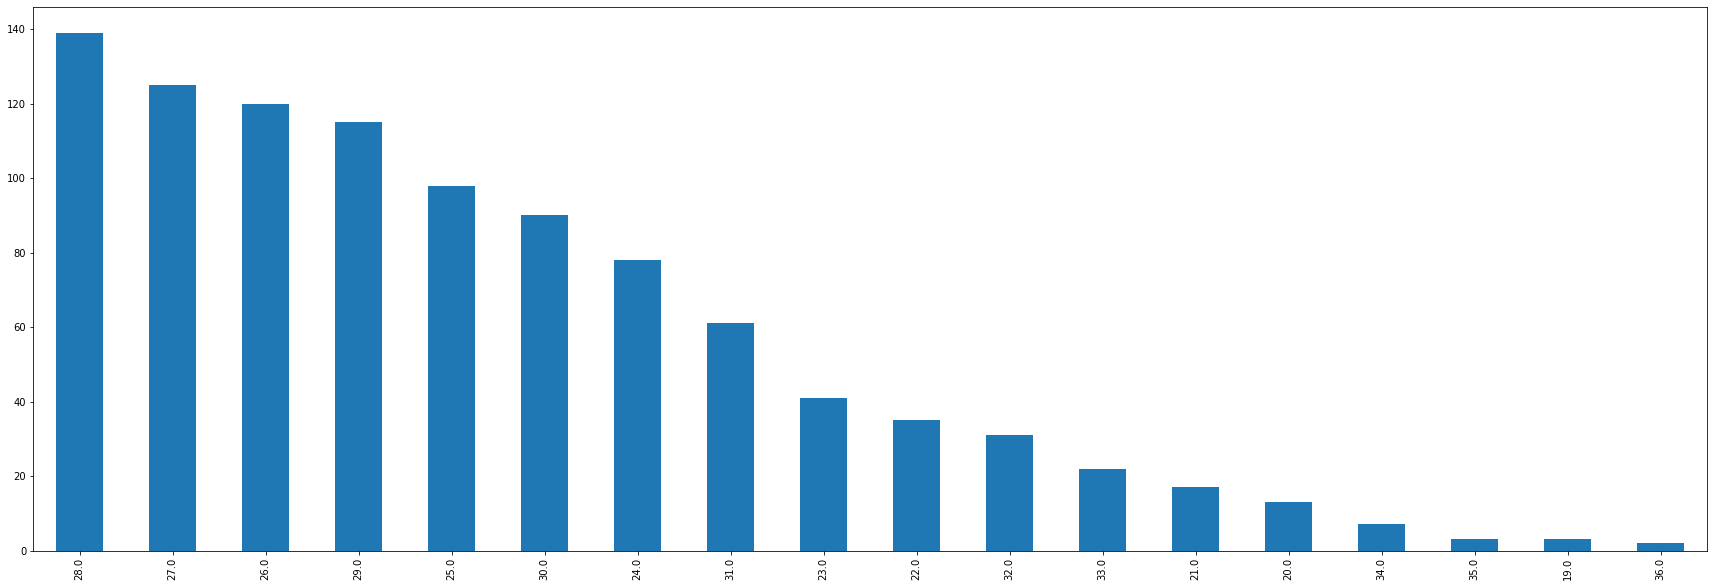

In [21]:
# your code here

age_population2 = pd.read_csv('../data/ages_population2.csv')

age_population2_sorted = age_population2['observation'].value_counts()

age_population2_sorted.plot(kind='bar', y='observation', figsize=(30, 10))
plt.show;

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [22]:
"""
your comments here

On the Left side they seem to be much higher and have a less steap curve.

"""

'\nyour comments here\n\nOn the Left side they seem to be much higher and have a less steap curve.\n\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [23]:
# your code here

age_population2_mean = age_population2['observation'].mean()

print(age_population2_mean)

age_population2_std = age_population2['observation'].std()

print(age_population2_std)

27.155
2.9698139326891835


In [24]:
"""
your comments here

Both numbers seem to be lower

"""

'\nyour comments here\n\nBoth numbers seem to be lower\n\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

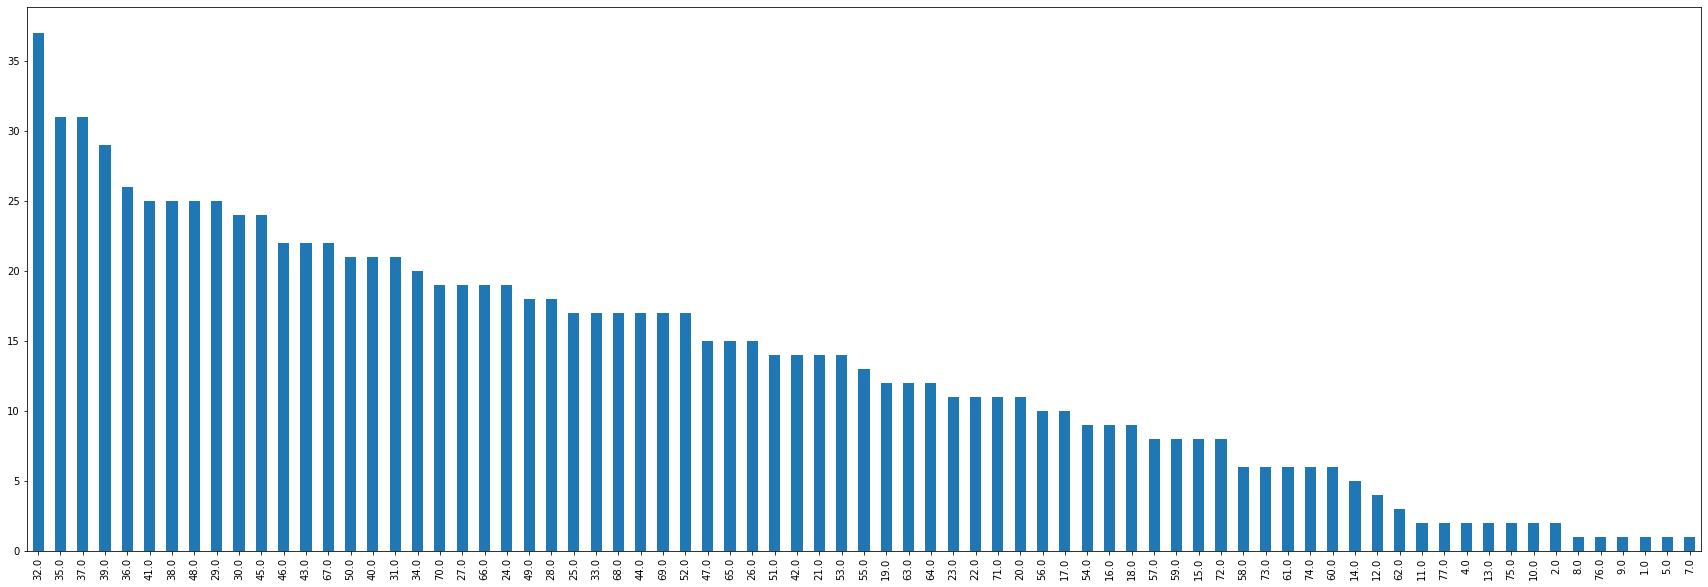

In [25]:
# your code here

age_population3 = pd.read_csv('../data/ages_population3.csv')

age_population3_sorted = age_population3['observation'].value_counts()

age_population3_sorted.plot(kind='bar', y='observation', figsize=(30, 10))
plt.show;

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [26]:
# your code here

age_population3_mean = age_population3['observation'].mean()

print(age_population3_mean)

age_population3_std = age_population3['observation'].std()

print(age_population3_std)

41.989
16.14470595986593


In [27]:
"""
your comments here

The numbers seem to be increasing.

"""

'\nyour comments here\n\nThe numbers seem to be increasing.\n\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
# your code here

age_population3.observation.quantile([0.25,0.5,0.75])

0.25    30.0
0.50    40.0
0.75    53.0
Name: observation, dtype: float64

In [29]:
"""
your comments here

The standard deviation has the same range as the 75 and 25 from the 50 percentile.

"""

'\nyour comments here\n\nThe standard deviation has the same range as the 75 and 25 from the 50 percentile.\n\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [30]:
# your code here

age_population3.observation.quantile([0.10,0.5,0.90])

0.1    22.0
0.5    40.0
0.9    67.0
Name: observation, dtype: float64

In [31]:
"""
your comments here

I used the 10 and 90 percentile to show that there are barely any children, young adults or elderly in the data.

"""

'\nyour comments here\n\nI used the 10 and 90 percentile to show that there are barely any children, young adults or elderly in the data.\n\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [32]:
# your code here

In [33]:
"""
your comments here
"""

'\nyour comments here\n'